<a href="https://colab.research.google.com/github/cristian-rincon/escuela-datascience/blob/master/introduccion_web_scrapping/scrapping_et.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

In [2]:
url_base = "https://eltiempo.com"

In [3]:
eltiempo = requests.get(url_base)
eltiempo.status_code

200

## Importando BeautifulSoup

In [4]:
from bs4 import BeautifulSoup

In [5]:
et_soup = BeautifulSoup(eltiempo.text,'lxml')
type(et_soup)

bs4.BeautifulSoup

### Menú principal del periódico

In [6]:
menu = et_soup.find('ul', attrs={'class':'default-menu'}).find_all('li')

In [7]:
colombia_item = menu[1]
colombia_item

<li class="colombia" itemprop="name">
<a href="/colombia" itemprop="url">Colombia</a>
</li>

### Obteniendo el texto al interior de una etiqueta

In [8]:
colombia_item.a.get_text()

'Colombia'

### Obteniendo el link de la etiqueta a

In [9]:
colombia_item.a.get('href')

'/colombia'

In [10]:
menu_links = [menu_item.a.get('href') for menu_item in menu]
menu_links

['/opinion',
 '/colombia',
 '/bogota',
 '/mundo',
 '/politica',
 '/justicia',
 '/economia',
 '/deportes',
 '/cultura',
 '/tecnosfera',
 '/vida',
 '/salud',
 '/unidad-investigativa',
 '/multimedia/videos']

In [11]:
colombia_section = requests.get(url_base + menu_links[1])
colombia_section

<Response [200]>

In [12]:
colombia_soup = BeautifulSoup(colombia_section.text, 'lxml')
colombia_soup.prettify()

'<!DOCTYPE html>\n<html>\n <head>\n  <script type="text/javascript">\n   var _sf_startpt=(new Date()).getTime()\n  </script>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>\n  <script type="text/javascript">\n   window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(23),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("internal-error",function(t){r(t.stack)}),s.dev&&i.on("fn-err",function(t,e,n){r(n.stack)}),s.dev&&(r("NR AGENT IN DEVELOPMENT MODE"),r("flags: "+a(s,fu

### Obteniendo el artículo principal

In [13]:
def get_feature_article(soup):
    feature_article = soup.find('div',attrs={'class':'apertura-seccion'})
    article_link = feature_article.a.get('href')
    return article_link

In [14]:
get_feature_article(colombia_soup)

'/colombia/cali'

### Obteniendo la lista de artículos secundarios

In [15]:
def get_articles_list(soup):
    articles_list = []
    feature_article = get_feature_article(soup)
    if feature_article:
        articles_list.append(feature_article)
    posts_list = soup.find('div',attrs={'class':'notas-col-izq'})
    for article in posts_list.find_all('a'):
        articles_list.append(article.get('href'))
    return list(set(articles_list))

In [16]:
# Revisar set() para eliminar los duplicados de la lista, convertir de nuevo en una lista 
# https://docs.python.org/3.8/library/stdtypes.html#set-types-set-frozenset
articles_list = get_articles_list(colombia_soup)
articles_list

['/colombia/cali/masacre-de-llano-verde-alcalde-de-cali-pidio-que-el-fbi-investigue-la-masacre-en-cali-colombia-534086',
 '/contenido-comercial/vision-colaborativa-para-generar-valor-a-las-empresas-colombianas-532698',
 '/colombia/otras-ciudades/sos-cartagena-alimentacion-solidaria-restaurantes-y-hoteles-llevan-comida-a-los-mas-necesitados-534166',
 '/contenido-comercial',
 '/colombia/cali/noticias-de-cali-ordenan-arresto-contra-gobernadora-del-valle-del-cauca-por-una-tutela-534328',
 '/colombia/otras-ciudades/reapertura-santa-marta-abrira-sus-playas-el-primer-fin-de-semana-de-septiembre-534424',
 '/colombia/cali/noticias-de-cali-mataron-a-la-exesposa-de-el-sobrino-aliado-del-clan-comba-ultimas-noticias-534296',
 '/colombia/otras-ciudades',
 '/colombia/cali/ultimo-adios-a-seis-jovenes-asesinados-en-el-tambo-cauca-534226',
 '/colombia/cali',
 None]

### Obtener la información de un artículo

In [37]:
def scrap_article(url_article):
    try:
        article = requests.get(url_article)
        if article.status_code == 200:
            article_soup = BeautifulSoup(article.text,'html5lib') # .prettify()
            # Extracting Title
            title = article_soup.find('h1', attrs={'class':'titulo'})
            print(title.text)
            # Extracting volanta
            volanta = article_soup.find('p', attrs={'class':'info'})
            print(volanta.text)
            # Extracting date
            date = article_soup.find('span', attrs={'class':'fecha'})
            print(date.text)
            # Extracting Author
            author = article_soup.find('span', attrs={'class':'nombre'})
            print(author.text)
            # Extracting text
            text = article_soup.find_all('p', attrs={'class':'contenido'})
            for t in text:
                print(t.text)
    except Exception as e:
        print('Ha ocurrido un error con la extracción del artículo.')
        print(e)
        print('\n')

In [18]:
# !pip install -U beautifulsoup4

In [38]:
article_test = url_base + articles_list[0]
# article_test
# article_test = requests.get(article_test)
# article_soup = BeautifulSoup(article_test.text,'lxml').prettify()
#scrap_article(article_test)
article_test

'https://eltiempo.com/colombia/cali/masacre-de-llano-verde-alcalde-de-cali-pidio-que-el-fbi-investigue-la-masacre-en-cali-colombia-534086'

In [39]:
scrap_article(article_test)

Alcalde de Cali pidió que el FBI investigue la masacre de Llano Verde
El mandatario le hizo esta solicitud al fiscal general de la Nación, Francisco Barbosa. 

27 de agosto 2020 , 05:45 p.m.

Cali
El alcalde de Cali, Jorge Iván Ospina, a través de una carta enviada al Fiscal General de la Nación, Francisco Barbosa, solicitó que el FBI (Federal Bureau of Investigation) acompañe la investigación de la masacre de cinco menores de edad que conmocionó a toda la ciudad y el país el pasado 11 de agosto en el oriente  de esta capital del Valle.(Le recomendamos leer: El día cuando un presidente colombiano ordenó fusilar a su sobrino)
La masacre ocurrió en Llano Verde, el barrio creado hace siete años para familias en condición de desplazamientos o reinserción, que fueron reubicadas por vivir en zonas inundables en el jarillón del río Cauca. Los cadáveres de los niños fueron hallados por sus familias en un cañaduzal. (Lea también: Llano Verde, acorralado por odios y grupos armados)"Estamos en un

In [46]:
media_req = requests.get(article_test)


In [50]:
media = BeautifulSoup(media_req.text,'html5lib')
# media

In [53]:
media_fig = media.find('figure', attrs={'class':'foto-apertura-articulo'})
images = media_fig.find_all('img')
images

[]

In [57]:
if len(images) == 0:
    print('No se encontraron imágenes')
else:
    image = images[-1]
    img_src = image.get('data-original')
    print(img_src)

/files/article_main/uploads/2020/08/14/5f374767cc9a2.jpeg


In [58]:
img_req = requests.get(url_base + img_src)
img_req

<Response [200]>

In [59]:
# To see images on jupyter
from IPython.display import Image

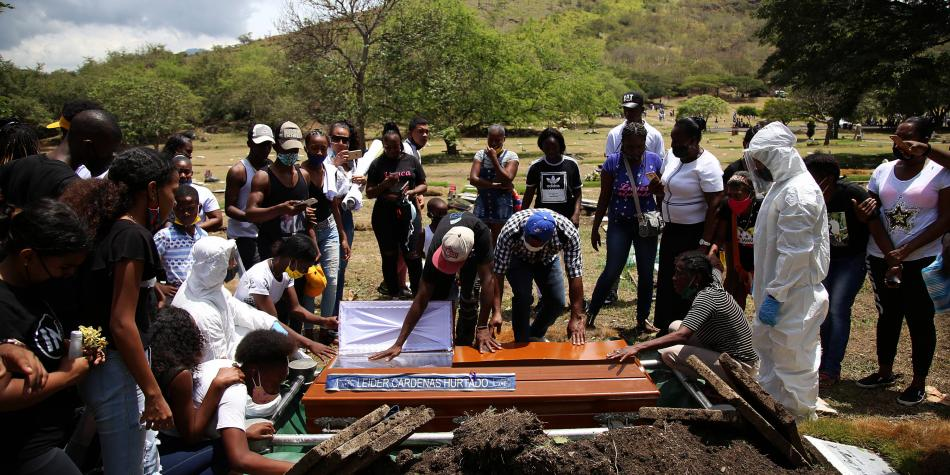

In [60]:
Image(img_req.content)